In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [39]:
data2d_gaussian=pd.read_csv('25-04-2022-results_2d_gaussian.csv')
data2d_uniform =pd.read_csv('25-04-2022-results_2d.csv')
data1d_period =pd.read_csv('25-04-2022-results1D.csv')
data1d_amplitude =pd.read_csv('25-04-2022-results1D-sample.csv')
dropout =pd.read_csv('(baseline-dropout)05-05-2022-results1D.csv')

In [40]:
tratamiento = data1d_amplitude

In [48]:
data2d_gaussian.loc[data2d_gaussian['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-gaussian'
data2d_uniform.loc[data2d_uniform['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-uniform'
data1d_period.loc[data1d_period['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-period'
data1d_amplitude.loc[data1d_amplitude['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-amplitude'
dropout.loc[dropout['aux_loss_activated']==False, 'aux_loss_activated'] = 'dropout'

In [49]:
baseline = pd.read_csv('baseline25-04-2022-results1D.csv')

In [50]:
data = pd.concat([baseline,dropout, data2d_gaussian, data2d_uniform, data1d_period, data1d_amplitude])

In [51]:
data['f1_test'] = data['f1_test']*100
data['recall_test'] = data['recall_test']*100

In [52]:
data=data[data.n>5000]

In [53]:
np.round(data[['acc_test', 'recall_test','f1_test','n','aux_loss_activated']].groupby(['n','aux_loss_activated']).agg({'acc_test': ['max','median', 'mean'], 
                                                                          'recall_test': ['max', 'median', 'mean'], 
                                                                        'f1_test': ['max', 'median', 'mean']}),2).to_latex()

'\\begin{tabular}{llrrrrrrrrr}\n\\toprule\n       &         & \\multicolumn{3}{l}{acc\\_test} & \\multicolumn{3}{l}{recall\\_test} & \\multicolumn{3}{l}{f1\\_test} \\\\\n       &         &      max & median &   mean &         max & median &   mean &     max & median &   mean \\\\\nn & aux\\_loss\\_activated &          &        &        &             &        &        &         &        &        \\\\\n\\midrule\n10000  & False &    70.90 &  67.62 &  67.53 &       96.05 &  95.49 &  95.37 &   81.05 &  79.12 &  79.05 \\\\\n       & 1D-amplitude &    70.89 &  63.45 &  63.51 &       97.40 &  95.95 &  95.62 &   80.76 &  76.39 &  76.29 \\\\\n       & 1D-period &    72.62 &  68.36 &  68.67 &       95.97 &  94.51 &  94.65 &   81.72 &  79.21 &  79.57 \\\\\n       & 2D-gaussian &    72.33 &  63.83 &  64.96 &       97.20 &  96.35 &  96.09 &   81.85 &  76.79 &  77.43 \\\\\n       & 2D-uniform &    71.78 &  63.43 &  64.27 &       97.39 &  96.05 &  95.22 &   82.21 &  76.45 &  76.70 \\\\\n       & drop

In [36]:
data.columns

Index(['Unnamed: 0', 'acc_train', 'acc_test', 'recall_train', 'recall_test',
       'f1_train', 'f1_test', 'epsilon', 'batch_size', 'hidden_size',
       'aux_loss_activated', 'EPS1', 'n', 'opt'],
      dtype='object')

In [10]:
index = 'recall_test'

IndexError: list index out of range

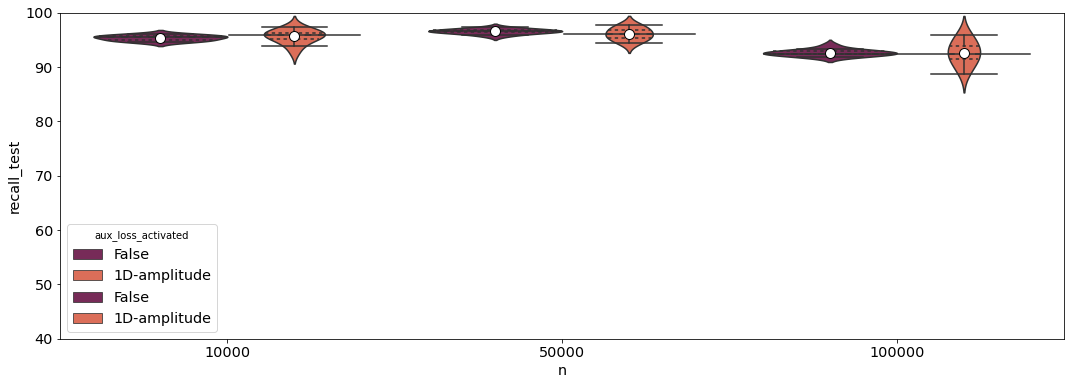

In [11]:
plt.figure(figsize=(18,6))
plt.ylim(40,100)
sns.boxplot(x="n", y=index, palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="n",bw=0.8, y=index,inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==True) ].groupby(['n'])[index].median().tolist()
yposlist_false = data[(data.aux_loss_activated==False) ].groupby(['n'])[index].median().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.2, yposlist[i]-15, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))

yposlist = data[(data.aux_loss_activated==True) ].groupby(['n'])[index].max().tolist()
yposlist_false = data[(data.aux_loss_activated==False) ].groupby(['n'])[index].max().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.28, yposlist[i], '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i], '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))

    
    
for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (0.35, 1.1, 0.5, 0.2), title="Regularization", ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)
ax.set_yticklabels(['{}%'.format(int(x)) for x in ax.get_yticks()])


In [ ]:
from scipy import stats
from scipy.stats import wilcoxon, ttest_ind, ttest_rel


for n in data.n.unique():
    samples1 = data[(data.aux_loss_activated==False) & (data.batch_size>128)].acc_test.to_list()
    samples2 = data[(data.aux_loss_activated==True) & (data.batch_size>128)].acc_test.to_list()
    print(n)
    print(np.mean(samples1))
    print(np.mean(samples2))
           
    stat, p = ttest_rel(samples1, samples2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    
        

In [ ]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,6))
losses = [True, False]

colors = ['red', 'black']
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size), color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_xlabel("Accuracy on testing set",fontsize=24)
ax.set_ylabel("Cummulative distribution",fontsize=24)


plt.legend(title = "Regularization", prop={'size':20},
           loc='upper left', bbox_to_anchor= (0.35, 1.1, 0.5, 0.2),
           ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white')

ax.tick_params(labelsize=20)



#plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
#plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')




plt.xlim(50,100)
plt.ylim(0,subset.shape[0])
plt.show()



fig, ax = plt.subplots(figsize=(15,6))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(50,95)
plt.xlabel('Accuracy on testing set',fontsize=24)
plt.ylabel('Density distribution',fontsize=24)
plt.legend(title = "Regularization", prop={'size':20},
           loc='upper left', bbox_to_anchor= (0.35, 1.1, 0.5, 0.2),
           ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white')
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_test'].mean(),1)
plt.text(mean1+0.2, 0.01,'{}%'.format(str(mean1)),rotation=90, fontsize=24)
plt.text(mean2-1, 0.01,'{}%'.format(str(mean2)),rotation=90, fontsize=24)
fmt = '%.0f%%'
xticks = matplotlib.ticker.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.tick_params(labelsize=20)

plt.show()
